<a href="https://colab.research.google.com/github/GussAlves/Tech-Challenge---1IADT/blob/main/Tech_Challenge_1IADT_Fase_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Tech Challenge - 1IADT - Fase 4** 📷

## Imports das bibliotecas

In [ ]:
# Instala as bibliotecas necessárias
!pip install deepface
!pip install fer
!pip install lz4
!pip install matplotlib
!pip install mtcnn
!pip install opencv-python
!pip install tensorflow
!pip install --upgrade joblib

# Importações em ordem alfabética
from collections import defaultdict
import cv2
from deepface import DeepFace
from fer import FER
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import numpy as np
import pandas as pd
import os

#Teste MTCNN

Detecção de rostos e análise de emoções para processar um vídeo. realiza a detecção rostos em cada frame usando o MTCNN, analisa as emoções predominantes com a biblioteca DeepFace, e salva os frames processados em uma pasta. Além disso, ele contabiliza a frequência de emoções e a presença ou ausência de pessoas em cada frame, gerando um resumo ao final. O objetivo é identificar e quantificar as emoções e atividades ao longo do vídeo. 🎥😊



In [ ]:
# Inicialização do detector de rostos MTCNN
try:
    detector = MTCNN()
    print("Detector MTCNN inicializado com sucesso.")
except Exception as e:
    print(f"Erro ao inicializar o detector MTCNN: {e}")

# Função para analisar emoções em um rosto
def analyze_emotions(frame, face):
    x, y, w, h = face['box']
    face_img = frame[y:y+h, x:x+w]  # Recorta o rosto
    result = DeepFace.analyze(face_img, actions=['emotion'], enforce_detection=False)
    return result[0]['emotion']

# Função para detectar rostos e analisar emoções em um vídeo
def detect_faces_and_emotions(video_path, output_folder="output_frames"):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)  # Cria a pasta de saída se não existir

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erro ao abrir o vídeo: {video_path}")
        return

    # Dicionários para contabilizar emoções e atividades
    emotion_count = defaultdict(int)
    activity_count = defaultdict(int)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Fim do vídeo ou erro ao capturar frame.")
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(frame_rgb)

        # Contabiliza atividades (presença de rostos)
        if len(faces) > 0:
            activity_count["pessoas presentes"] += 1
        else:
            activity_count["nenhuma pessoa"] += 1

        for face in faces:
            x, y, width, height = face['box']
            cv2.rectangle(frame, (x, y), (x + width, y + height), (0, 255, 0), 2)

            # Analisa as emoções do rosto detectado
            emotions = analyze_emotions(frame_rgb, face)
            print(f"Frame {frame_count}: Emoções detectadas = {emotions}")

            # Contabiliza a emoção predominante no rosto
            predominant_emotion = max(emotions, key=emotions.get)
            emotion_count[predominant_emotion] += 1

            # Exibe as emoções no frame
            emotion_text = f"Emotion: {predominant_emotion}"
            cv2.putText(frame, emotion_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Salva o frame com as detecções
        output_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(output_path, frame)
        print(f"Frame {frame_count} salvo em {output_path}")

        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

    # Retorna os resultados contabilizados
    return emotion_count, activity_count

# Função para gerar o resumo
def generate_summary(emotion_count, activity_count):
    print("\n--- Resumo das Emoções Detectadas ---")
    for emotion, count in emotion_count.items():
        print(f"{emotion}: {count} vezes")

    print("\n--- Resumo das Atividades Detectadas ---")
    for activity, count in activity_count.items():
        print(f"{activity}: {count} frames")

# Caminho do vídeo (certifique-se de que o arquivo existe)
video_path = "Emotion.mp4"  # Substitua pelo caminho do seu vídeo

# Pasta para salvar os frames processados
output_folder = "output_frames"

# Processa o vídeo e gera o resumo
emotion_count, activity_count = detect_faces_and_emotions(video_path, output_folder)
generate_summary(emotion_count, activity_count)

Detector MTCNN inicializado com sucesso.
25-02-17 15:59:26 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 45.0MB/s]


A saída de streaming foi truncada nas últimas 5000 linhas.
Frame 532 salvo em output_frames/frame_0532.jpg
Frame 533 salvo em output_frames/frame_0533.jpg
Frame 534 salvo em output_frames/frame_0534.jpg
Frame 535 salvo em output_frames/frame_0535.jpg
Frame 536 salvo em output_frames/frame_0536.jpg
Frame 537 salvo em output_frames/frame_0537.jpg
Frame 538 salvo em output_frames/frame_0538.jpg
Frame 539 salvo em output_frames/frame_0539.jpg
Frame 540 salvo em output_frames/frame_0540.jpg
Frame 541 salvo em output_frames/frame_0541.jpg
Frame 542 salvo em output_frames/frame_0542.jpg
Frame 543 salvo em output_frames/frame_0543.jpg
Frame 544 salvo em output_frames/frame_0544.jpg
Frame 545 salvo em output_frames/frame_0545.jpg
Frame 546 salvo em output_frames/frame_0546.jpg
Frame 547 salvo em output_frames/frame_0547.jpg
Frame 548 salvo em output_frames/frame_0548.jpg
Frame 549 salvo em output_frames/frame_0549.jpg
Frame 550 salvo em output_frames/frame_0550.jpg
Frame 551 salvo em output_fra

#Teste FER

Processa um vídeo para detectar rostos e analisar emoções em cada frame. Ele utiliza o Haar Cascade para detecção de rostos e a biblioteca FER (Facial Expression Recognition) para identificar emoções. Os frames processados são salvos em uma pasta, e o código contabiliza a frequência de emoções e a presença ou ausência de pessoas. Ao final, ele gera um resumo das emoções detectadas e das atividades ao longo do vídeo. 🎥😊

In [ ]:
# Função para detectar rostos e analisar emoções em um vídeo
def detect_faces_and_emotions(video_path, output_folder="/content/output_frames2"):
    # Cria a pasta de saída se não existir
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"Pasta '{output_folder}' criada com sucesso.")

    # Inicialização do detector de rostos Haar Cascade
    try:
        face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
        print("Detector Haar Cascade inicializado com sucesso.")
    except Exception as e:
        print(f"Erro ao inicializar o detector Haar Cascade: {e}")
        return

    # Inicialização do detector de emoções FER
    try:
        emotion_detector = FER(mtcnn=False)  # Usa OpenCV em vez de MTCNN
        print("Detector de emoções FER inicializado com sucesso.")
    except Exception as e:
        print(f"Erro ao inicializar o detector de emoções FER: {e}")
        return

    # Abre o vídeo
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Erro ao abrir o vídeo: {video_path}")
        return

    # Dicionários para contabilizar emoções e atividades
    emotion_count = defaultdict(int)
    activity_count = defaultdict(int)

    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Fim do vídeo ou erro ao capturar frame.")
            break

        # Converte o frame para escala de cinza (necessário para Haar Cascade)
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detecta rostos no frame
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

        # Contabiliza atividades (presença de rostos)
        if len(faces) > 0:
            activity_count["pessoas presentes"] += 1
        else:
            activity_count["nenhuma pessoa"] += 1

        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # Recorta o rosto detectado
            face_img = frame[y:y+h, x:x+w]

            # Analisa as emoções do rosto detectado
            emotions = emotion_detector.detect_emotions(face_img)
            if emotions:
                predominant_emotion = max(emotions[0]['emotions'], key=emotions[0]['emotions'].get)
                emotion_count[predominant_emotion] += 1

                # Exibe as emoções no frame
                emotion_text = f"Emotion: {predominant_emotion}"
                cv2.putText(frame, emotion_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Salva o frame com as detecções
        output_path = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(output_path, frame)
        print(f"Frame {frame_count} salvo em {output_path}")

        frame_count += 1

    cap.release()
    cv2.destroyAllWindows()

    # Retorna os resultados contabilizados
    return emotion_count, activity_count

# Função para gerar o resumo
def generate_summary(emotion_count, activity_count):
    print("\n--- Resumo das Emoções Detectadas ---")
    for emotion, count in emotion_count.items():
        print(f"{emotion}: {count} vezes")

    print("\n--- Resumo das Atividades Detectadas ---")
    for activity, count in activity_count.items():
        print(f"{activity}: {count} frames")

# Caminho do vídeo (certifique-se de que o arquivo existe)
video_path = "Emotion.mp4"  # Substitua pelo caminho do seu vídeo

# Pasta para salvar os frames processados
output_folder = "/content/output_frames2"  # Pasta padrão no Colab
# output_folder = "/content/drive/MyDrive/output_frames2"  # Para salvar no Google Drive

# Processa o vídeo e gera o resumo
emotion_count, activity_count = detect_faces_and_emotions(video_path, output_folder)
generate_summary(emotion_count, activity_count)

Pasta '/content/output_frames2' criada com sucesso.
Detector Haar Cascade inicializado com sucesso.
Detector de emoções FER inicializado com sucesso.
Frame 0 salvo em /content/output_frames2/frame_0000.jpg
Frame 1 salvo em /content/output_frames2/frame_0001.jpg
Frame 2 salvo em /content/output_frames2/frame_0002.jpg
Frame 3 salvo em /content/output_frames2/frame_0003.jpg
Frame 4 salvo em /content/output_frames2/frame_0004.jpg
Frame 5 salvo em /content/output_frames2/frame_0005.jpg
Frame 6 salvo em /content/output_frames2/frame_0006.jpg
Frame 7 salvo em /content/output_frames2/frame_0007.jpg
Frame 8 salvo em /content/output_frames2/frame_0008.jpg
Frame 9 salvo em /content/output_frames2/frame_0009.jpg
Frame 10 salvo em /content/output_frames2/frame_0010.jpg
Frame 11 salvo em /content/output_frames2/frame_0011.jpg
Frame 12 salvo em /content/output_frames2/frame_0012.jpg
Frame 13 salvo em /content/output_frames2/frame_0013.jpg
Frame 14 salvo em /content/output_frames2/frame_0014.jpg
Frame

#Comparação entre modelos

Compara a frequência de emoções detectadas por dois modelos (MTCNN + DeepFace e Haar Cascade + FER). Ele organiza os dados em um DataFrame estilizado, destaca os valores máximos e gera um gráfico de barras lado a lado para visualização. O objetivo é facilitar a análise e comparação das emoções detectadas por cada modelo.



,Emotion,MTCNN_DeepFace,Haar_FER
0,sad,118,699
1,fear,28,491
2,neutral,240,608
3,happy,423,635
4,angry,108,202
5,disgust,5,0
6,surprise,189,203


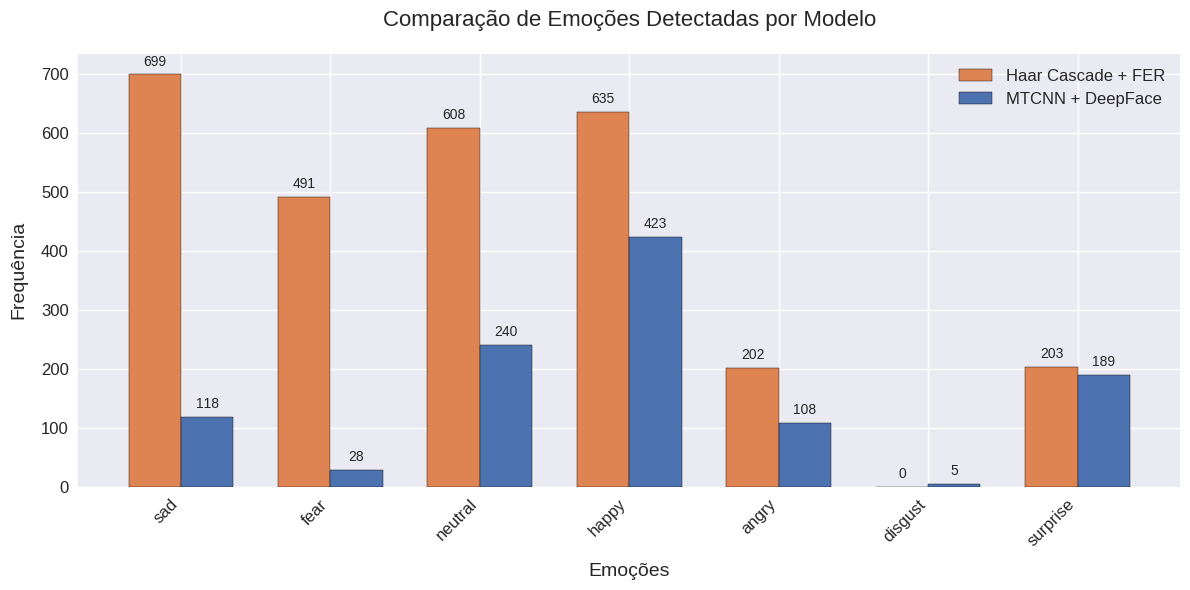

In [ ]:
emotions_mtcnn = {
    "sad": 118,
    "fear": 28,
    "neutral": 240,
    "happy": 423,
    "angry": 108,
    "disgust": 5,
    "surprise": 189
}

emotions_haar = {
    "neutral": 608,
    "sad": 699,
    "angry": 202,
    "fear": 491,
    "happy": 635,
    "surprise": 203
}

data = {
    "Emotion": list(emotions_mtcnn.keys()),
    "MTCNN_DeepFace": list(emotions_mtcnn.values()),
    "Haar_FER": [emotions_haar.get(emotion, 0) for emotion in emotions_mtcnn.keys()]
}

df = pd.DataFrame(data)

def style_dataframe(df):
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: #FFD700' if v else '' for v in is_max]

    styled_df = df.style \
        .apply(highlight_max, subset=["MTCNN_DeepFace", "Haar_FER"]) \
        .set_properties(**{
            'border': '1px solid #DDDDDD',
            'text-align': 'center',
            'font-size': '14px',
            'padding': '5px',
            'background-color': '#F7F7F7',
            'color': '#333333'
        }) \
        .set_table_styles([{
            'selector': 'th',
            'props': [
                ('background-color', '#4C72B0'),
                ('color', 'white'),
                ('font-size', '16px'),
                ('border', '1px solid #DDDDDD')
            ]
        }]) \
        .set_caption("Comparação de Emoções Detectadas por Modelo") \
        .format({
            "MTCNN_DeepFace": "{:,}",
            "Haar_FER": "{:,}"
        })

    return styled_df

styled_df = style_dataframe(df)
display(styled_df)

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = np.arange(len(df))

plt.bar(index, df["Haar_FER"], width=bar_width, label="Haar Cascade + FER", color="#DD8452", edgecolor="black")
plt.bar(index + bar_width, df["MTCNN_DeepFace"], width=bar_width, label="MTCNN + DeepFace", color="#4C72B0", edgecolor="black")

plt.xlabel("Emoções", fontsize=14, labelpad=10)
plt.ylabel("Frequência", fontsize=14, labelpad=10)
plt.title("Comparação de Emoções Detectadas por Modelo", fontsize=16, pad=20)
plt.xticks(index + bar_width / 2, df["Emotion"], rotation=45, ha="right", fontsize=12)

plt.yticks(fontsize=12)

for i, (haar, mtcnn) in enumerate(zip(df["Haar_FER"], df["MTCNN_DeepFace"])):
    plt.text(i, haar + 10, str(haar), ha="center", va="bottom", fontsize=10)
    plt.text(i + bar_width, mtcnn + 10, str(mtcnn), ha="center", va="bottom", fontsize=10)

print(f"\n \n \n")
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

#Detecção de objetos

Utilização do YOLOv3 para detectar objetos em imagens. Ele processa todas as imagens de uma pasta, desenha caixas e rótulos nos objetos encontrados (como pessoas ou carros) e salva as imagens marcadas em outra pasta.



In [ ]:
from google.colab.patches import cv2_imshow  # Substituição para cv2.imshow no Colab

# Verifica se os arquivos YOLOv3 existem
if not os.path.exists("yolov3.cfg"):
    raise FileNotFoundError("Arquivo yolov3.cfg não encontrado!")
if not os.path.exists("yolov3.weights"):
    raise FileNotFoundError("Arquivo yolov3.weights não encontrado!")

# Carrega o modelo YOLOv3
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Carrega as classes (nomes dos objetos que o YOLOv3 pode detectar)
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Diretório onde as imagens originais estão salvas (não será alterado)
input_folder = "output_frames2"

# Diretório onde as imagens processadas serão salvas (você pode alterar esse valor)
output_folder = "output_frame_objects2"  # Altere para o caminho desejado

# Verifica se o diretório de entrada existe
if not os.path.exists(input_folder):
    raise FileNotFoundError(f"Diretório de entrada '{input_folder}' não encontrado!")

# Verifica se o diretório de saída existe; se não, cria o diretório
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Pasta de saída '{output_folder}' criada com sucesso.")

# Lista todos os arquivos de imagem no diretório de entrada
image_files = [f for f in os.listdir(input_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Verifica se há imagens no diretório de entrada
if not image_files:
    raise FileNotFoundError(f"Nenhuma imagem encontrada no diretório de entrada '{input_folder}'!")

# Processa cada imagem
for image_file in image_files:
    # Caminho completo da imagem de entrada
    input_path = os.path.join(input_folder, image_file)

    # Carrega a imagem
    image = cv2.imread(input_path)
    if image is None:
        print(f"Erro ao carregar a imagem: {input_path}")
        continue

    height, width, _ = image.shape

    # Prepara a imagem para a rede YOLOv3
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Obtém as detecções
    output_layers = net.getUnconnectedOutLayersNames()
    detections = net.forward(output_layers)

    # Processa as detecções
    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:  # Filtra detecções com confiança > 50%
                center_x = int(obj[0] * width)
                center_y = int(obj[1] * height)
                w = int(obj[2] * width)
                h = int(obj[3] * height)

                # Coordenadas da caixa delimitadora
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                # Desenha a caixa delimitadora e o rótulo
                cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
                label = f"{classes[class_id]}: {confidence:.2f}"
                cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Salva a imagem com as detecções no diretório de saída
    output_path = os.path.join(output_folder, f"detected_{image_file}")
    cv2.imwrite(output_path, image)
    print(f"Imagem processada salva em: {output_path}")

Imagem processada salva em: output_frame_objects2/detected_frame_1081.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_0680.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_2454.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_2561.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_0782.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_2774.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_3073.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_0507.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_0587.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_1209.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_2950.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_0622.jpg
Imagem processada salva em: output_frame_objects2/detected_frame_1835.jpg
Imagem processada salva em: output_fra

## Resumo de incidencias

Conta quantas vezes cada classe de objeto (como pessoas, carros, etc.) foi detectada pelo YOLOv3 em um conjunto de imagens. Ele processa as imagens, filtra as detecções com confiança acima de 50% e exibe um resumo das detecções por classe. No final, ele lista apenas as classes que tiveram pelo menos uma detecção. 🚀🔍

In [ ]:
# Dicionário para contar as detecções por classe
detection_count = {class_name: 0 for class_name in classes}

# Processa cada imagem
for image_file in image_files:
    # Caminho completo da imagem de entrada
    input_path = os.path.join(input_folder, image_file)

    # Carrega a imagem
    image = cv2.imread(input_path)
    if image is None:
        print(f"Erro ao carregar a imagem: {input_path}")
        continue

    height, width, _ = image.shape

    # Prepara a imagem para a rede YOLOv3
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Obtém as detecções
    output_layers = net.getUnconnectedOutLayersNames()
    detections = net.forward(output_layers)

    # Processa as detecções
    for detection in detections:
        for obj in detection:
            scores = obj[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            # Filtra detecções com confiança > 0 (todas as detecções)
            if confidence > 0.5:  # Remove a condição de confiança mínima
                class_name = classes[class_id]
                detection_count[class_name] += 1

# Filtra as classes com pelo menos 1 detecção
filtered_detections = {class_name: count for class_name, count in detection_count.items() if count > 0}

# Exibe o resumo das detecções
print("\n***** Resumo das Detecções *****")
for class_name, count in detection_count.items():
    if (count > 0 and class_name != 'person'):
      print(f" ** {class_name}: {count} detecções")
print("\n***** Final *****")


***** Resumo das Detecções *****
 ** bench: 8 detecções
 ** backpack: 1 detecções
 ** handbag: 213 detecções
 ** tie: 59 detecções
 ** bottle: 13 detecções
 ** cup: 506 detecções
 ** spoon: 2 detecções
 ** hot dog: 1 detecções
 ** chair: 5233 detecções
 ** sofa: 1280 detecções
 ** pottedplant: 1494 detecções
 ** diningtable: 719 detecções
 ** tvmonitor: 36 detecções
 ** laptop: 1977 detecções
 ** cell phone: 591 detecções
 ** book: 85 detecções
 ** vase: 32 detecções
 ** scissors: 2 detecções
 ** toothbrush: 13 detecções

***** Final *****


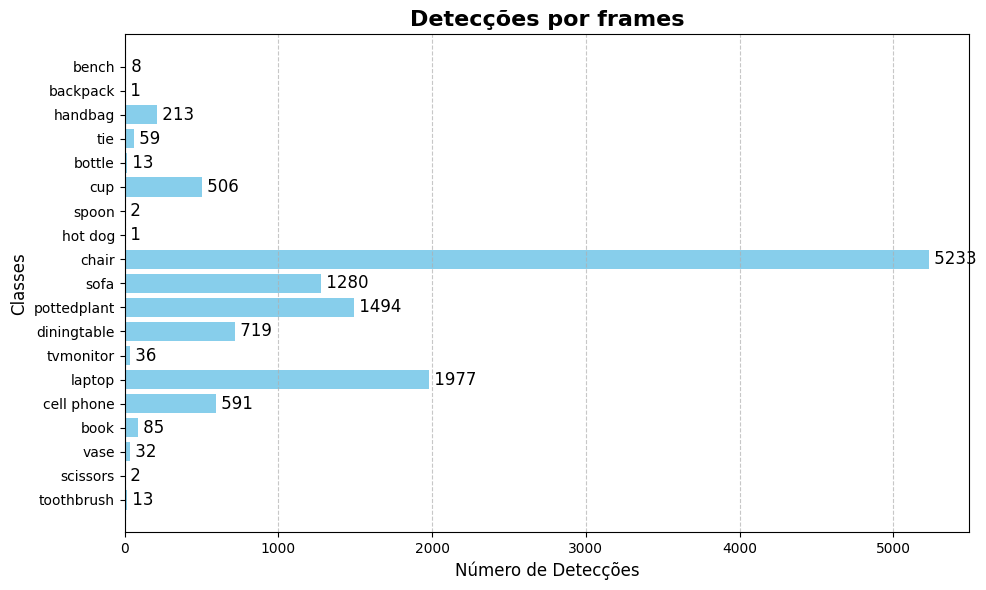

In [ ]:
# Listas para armazenar as categorias e valores
categorias = []
valores = []

# Filtra as classes com contagem maior que 0 e ignora a classe 'person'
for class_name, count in detection_count.items():
    if count > 0 and class_name != 'person':
        categorias.append(class_name)
        valores.append(count)

# Configura o tamanho da figura e cria o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(categorias, valores, color='skyblue')

# Adiciona título e rótulos aos eixos
plt.title('Detecções por frames', fontsize=16, fontweight='bold')
plt.xlabel('Número de Detecções', fontsize=12)
plt.ylabel('Classes', fontsize=12)

# Adiciona os valores nas barras
for index, value in enumerate(valores):
    plt.text(value, index, f' {value}', va='center', fontsize=12, color='black')

# Adiciona grid no eixo X e inverte a ordem das categorias
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()

# Ajusta o layout e exibe o gráfico
plt.tight_layout()
plt.show()